In [ ]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torchvision
from tqdm import trange

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Load data MNIST

In [ ]:
train = torchvision.datasets.MNIST(
                                   root = '/content/',
                                   train =True, 
                                   transform = None,
                                   download = True,
                                   target_transform =None
                                   )
test = torchvision.datasets.MNIST(
                                   root = '/content/',
                                   train =False, 
                                   transform = None,
                                   download = True,
                                   target_transform =None
                                   )
train.data.shape, train.targets.shape, test.data.shape

(torch.Size([60000, 28, 28]), torch.Size([60000]), torch.Size([10000, 28, 28]))

In [ ]:
x = train.data
y = train.targets
#------------
x_test = test.data
y_test = test.targets

# NN

In [ ]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # torch.nn.Linear(in_features: int, out_features: int, bias: bool = True)
        self.l1 = nn.Linear(784, 128)
        self.act = nn.ReLU()
        self.l2 = nn.Linear(128, 10)
    def forward(self, x):
        x = self.l1(x)
        x = self.act(x)
        x = self.l2(x)
        return x

Loss:  0.854, Accuracy: 0.844: 100%|██████████| 100/100 [00:00<00:00, 179.26it/s]


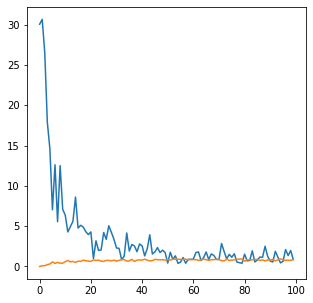

In [ ]:
model = Net()
batch = 32
losses, accuracies = [], []
loss_func = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters())
bar = trange(100)
for i in bar:
    samp = np.random.randint(0, x.shape[0], size = batch)
    X = x[samp].reshape(-1, 28*28).float()
    Y = y[samp].long()
    optim.zero_grad()
    out = model(X)
    cat = torch.argmax(out, dim=1)
    accuracy = (cat == Y).float().mean()
    loss = loss_func(out, Y)
    loss.backward()
    optim.step()
    loss, acc =  loss.item(), accuracy.item()
    losses.append(loss)
    accuracies.append(acc)
    bar.set_description('Loss:  %.3f, Accuracy: %.3f' % (loss, acc))

figsize(5, 5)
plot(losses)
plot(accuracies)

In [ ]:
# make predict
y_= model(x_test.reshape(-1, 28*28).float())
pred =  torch.argmax(y_, dim =1)
(y_test == pred).float().mean()

tensor(0.8199)

# Numpy

In [ ]:
# copy weight model to numpy
l1 = model.l1.weight.detach().numpy().T # 784 * 128
l2 = model.l2.weight.detach().numpy().T # 128 * 10

In [ ]:
# train
def forward(x: np.array)-> np.array:    
    x = x.dot(l1)    
    x = np.maximum(x, 0)    
    x = x.dot(l2)    
    return x

# evaluate
def evaluate(model)-> None:
    y_= model(x_test.reshape(-1, 28*28).numpy())
    pred =  np.argmax(y_, axis =1)
    print((y_test.numpy() == pred).mean())
evaluate(forward)

0.8193


CROSSENTROPYLOSS

$$loss(x, class) = -x[class] + \log(\sum\exp(x[j]))$$

In [ ]:
y_= forward(x_test.reshape(-1, 28*28).numpy())
pred =  np.argmax(y_, axis =1)

part2 = np.log(np.exp(y_).sum(axis = 1))
# for each pred for current mark
part1 = y_[range(y_.shape[0]), y_test]
ret = -part1 + part2
ret.mean()

1.037738

In [ ]:
loss_func(torch.tensor(y_), torch.tensor(y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


tensor(1.0377)

#Visual loss

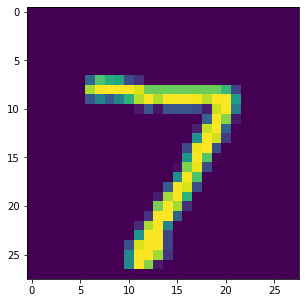

In [ ]:
m = np.argmin(ret)
imshow(x_test[m])

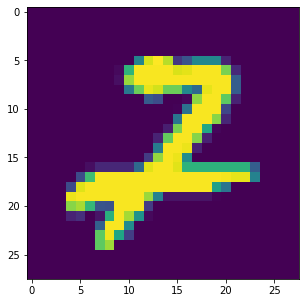

In [ ]:
m = np.argmax(ret)
imshow(x_test[m])

(array([4, 2, 7, 2, 7, 4, 6, 3, 9, 7, 1, 4]),
 array([9, 5, 9, 3, 9, 6, 4, 5, 4, 9, 5, 9]))

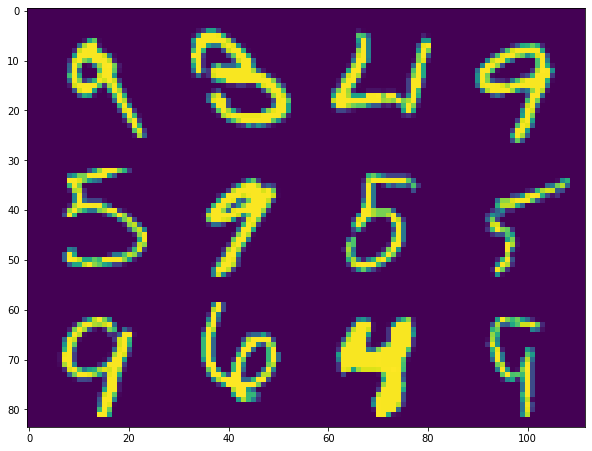

In [ ]:
idx = np.argwhere((y_test.numpy() != pred))
x_bad = x_test[idx].numpy()
bad = x_bad[:12]
figsize(10,10)
imshow(np.concatenate(bad.reshape((4, 28*3, 28)), axis = 1))
pred[idx][:12].ravel(), y_test[idx][:12].numpy().ravel()

# Derivative

retain_graph = True
- По сути, он сохранит всю необходимую информацию для вычисления определенной переменной, чтобы мы могли выполнить обратный проход по ней.

Will store all the information needed to compute a particular variable so that we can traverse it back.

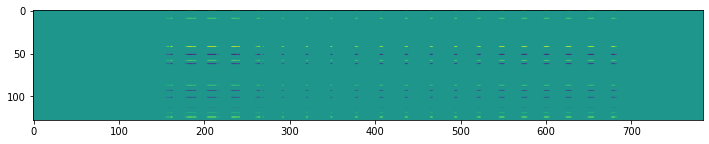

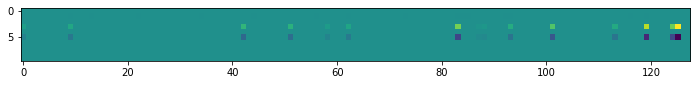

In [ ]:
samp = [0, 1,2,3]
X = x[samp].reshape(-1, 28*28).float()
Y = y[samp].long()
optim.zero_grad()
out = model(X)
out.retain_grad()
loss = loss_func(out, Y)
loss.retain_grad()
loss.backward()

# nice idea visual data
figsize(12, 12)
imshow(model.l1.weight.grad)
figure()
imshow(model.l2.weight.grad)

In [ ]:
samp = [0, 1,2,3]
X = x[samp].reshape(-1, 28*28).float()
Y = y[samp].long()
optim.zero_grad()
out = model(X)
print(model.l2.weight.grad)
loss = loss_func(out, Y)
loss.backward()
print(model.l2.weight.grad)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[ 5.7836e-05,  0.0000e+00,  0.0000e+00,  ...,  4.9476e-04,
          0.0000e+00,  0.0000e+00],
        [-3.0485e-02,  0.0000e+00,  0.0000e+00,  ...,  3.7277e-10,
          0.0000e+00,  0.0000e+00],
        [ 3.3311e-04,  0.0000e+00,  0.0000e+00,  ...,  2.8278e-04,
          0.0000e+00,  0.0000e+00],
        ...,
        [ 3.1717e-05,  0.0000e+00,  0.0000e+00,  ...,  2.7129e-04,
          0.0000e+00,  0.0000e+00],
        [ 8.6723e-05,  0.0000e+00,  0.0000e+00,  ...,  5.4288e-08,
          0.0000e+00,  0.0000e+00],
        [ 5.6416e-06,  0.0000e+00,  0.0000e+00,  ...,  2.6545e-05,
          0.0000e+00,  0.0000e+00]])


# softmax, log softmax, and NLL

In [ ]:
data = torch.randn(4, 10)
tr = torch.randint(10, size = (4, )).long()
data,  tr

(tensor([[ 0.3373, -1.6377,  0.4861, -0.7869, -2.6035,  0.9390,  0.5444,  0.5509,
           0.8709, -0.6269],
         [-1.1598, -1.4426, -1.1007,  1.4467,  0.0531, -0.8787, -0.6854,  0.5158,
          -1.7392,  0.6283],
         [ 1.1539,  0.7221, -1.1378,  0.3056,  2.2992,  1.2791, -0.6670,  1.2007,
           0.6014,  0.0834],
         [-1.4266, -0.5874,  0.8307,  1.2288,  0.2074,  0.4493,  1.0908, -0.3545,
           0.1501, -0.2754]]), tensor([7, 3, 6, 1]))

In [ ]:
def softmax(x):
    return x.exp() / (x.exp().sum(-1)).unsqueeze(-1)
def nl(prd, tr):
    return - prd[range(tr.shape[0]), tr].log().mean()

prd = softmax(data)
loss = nl(prd, tr)
loss

tensor(2.5463)

In [ ]:
prd = F.log_softmax(data, dim=-1)
loss = F.nll_loss(prd, tr)
loss

tensor(2.5463)

In [ ]:
def log_softmax(x):
    return x - (x.exp().sum(-1).log()).unsqueeze(-1)
def nll(prd, tr):
    return - prd[range(tr.shape[0]), tr].mean()

prd = log_softmax(data)
loss = nll(prd, tr)
loss

tensor(2.5463)

In [ ]:
F.cross_entropy(data, tr)

tensor(2.5463)

In [ ]:
def log_softmax_npy(x):
    # np.exp is not stable because it has Inf. So you should subtract maximum in x.
    # http://gregorygundersen.com/blog/2020/02/09/log-sum-exp/
    # x numpy   
    mx = x.max(axis=1)
    stbl = mx + np.log(np.exp(x- mx.reshape((-1, 1))).sum(axis=1))
    return x - stbl.reshape(-1,1)


prd = log_softmax_npy(data.numpy())
nll(torch.tensor(prd), tr)

tensor(2.5463)

# Backward numpy test

In [ ]:
# for test take weoght from model
l1 = model.l1.weight.detach().numpy().T
l2 = model.l2.weight.detach().numpy().T
l1.shape, l2.shape

((784, 128), (128, 10))

In [ ]:
# train
x_sample = x[samp].reshape(-1, 28*28).float().numpy()
out = np.zeros((len(Y),10), np.float32)
out[range(out.shape[0]),Y] = 1


x_l1 = x_sample.dot(l1)
x_relu = np.maximum(x_l1, 0)
x_l2 = x_relu.dot(l2)
x_lsm = log_softmax_npy(x_l2)
x_loss = (-out * x_lsm).mean(axis=1)

backward function softmax:

$$y_j(g_j - \sum y_k*g_k)$$

np.exp(x - logsumexp(x))

https://sgugger.github.io/a-simple-neural-net-in-numpy.html

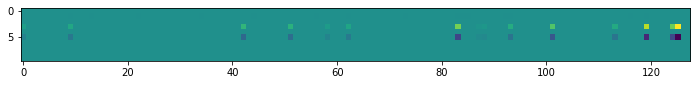

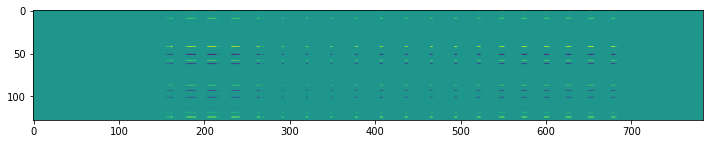

In [ ]:
# compute the gradient
d_out = -out / len(Y)

dx_lsm = d_out - np.exp(x_lsm)*d_out.sum(axis=1).reshape((-1, 1))
d_l2 = x_relu.T.dot(dx_lsm)

dx_relu = dx_lsm.dot(l2.T)

dx_l1 = (x_relu > 0).astype(np.float32) * dx_relu
d_l1 = x_sample.T.dot(dx_l1)

imshow(d_l2.T)
figure()
imshow(d_l1.T)

https://zhang-yang.medium.com/understanding-cross-entropy-implementation-in-pytorch-softmax-log-softmax-nll-cross-entropy-416a2b200e34

https://deepnotes.io/softmax-crossentropy

https://sgugger.github.io/a-simple-neural-net-in-numpy.html

https://github.com/eliben/deep-learning-samples/blob/master/softmax/softmax.py

https://cs231n.github.io/neural-networks-case-study/

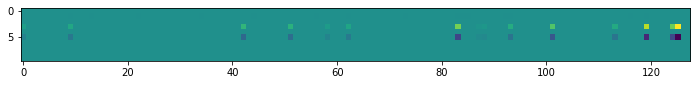

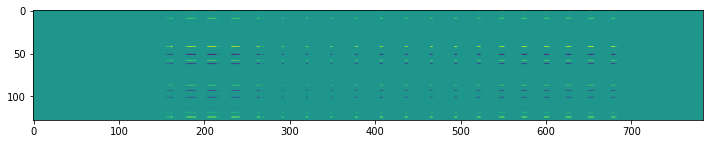

In [ ]:
def backward(x: np.array, y: np.array, l1: np.array, l2: np.array) -> np.array:
    
    out = np.zeros((len(y),10), np.float32)
    out[range(out.shape[0]),y] = 1
    x_l1 = x.dot(l1)
    x_relu = np.maximum(x_l1, 0)
    x_l2 = x_relu.dot(l2)
    x_lsm = log_softmax_npy(x_l2)
    x_loss = (-out * x_lsm).mean(axis=1)

    # compute the gradient
    d_out = -out / len(y)
    # l2
    dx_lsm = d_out - np.exp(x_lsm)*d_out.sum(axis=1).reshape((-1, 1))
    d_l2 = x_relu.T.dot(dx_lsm)
    # relu
    dx_relu = dx_lsm.dot(l2.T)
    # l1
    dx_l1 = (x_relu > 0).astype(np.float32) * dx_relu
    d_l1 = x.T.dot(dx_l1)
    return x_loss, x_l2, d_l1, d_l2


samp = [0, 1,2,3]
X = x[samp].reshape(-1, 28*28).float().numpy()
Y = y[samp].long()

x_loss, x_l2, d_l1, d_l2 = backward(X, Y.numpy(), l1, l2)
imshow(d_l2.T)
figure()
imshow(d_l1.T)

# Init weight

Основная идея общего правила заключается в том, чтобы инициализировать веса, не будучи слишком маленькими, но близкими к 0 в диапазоне [-y, y], где y = 1 / sqrt (n) (n - количество входов, переданных нейрону)

The main idea of the general rule is to initialize the weights without being too small, but close to 0 in the range [-y, y], where y = 1 / sqrt (n) (n is the number of inputs passed to the neuron)

In [ ]:
xx = torch.randn((4, 786))
w1 = torch.randn((786,128))
b1 = torch.randn(128)

# dot not work
l1 = torch.mm(xx, w1) + b1
l1.mean(), l1.std()

(tensor(-0.5356), tensor(27.1214))

In [ ]:
w1 = torch.randn((786,128)) * np.sqrt(2. / 786)

def relu(x: np.array) -> np.array:
    """
    a = torch.tensor([-1, 0, -1, 1,2])
    torch.clamp(a, min =0)
    
    >> tensor([0, 0, 0, 1, 2])
    """
    return torch.clamp(x, min =0)

# dot not work
l1 = torch.mm(xx, w1) + b1
rell = relu(l1)
l1.mean(), l1.std(), rell.mean(), rell.std()

(tensor(-0.0333), tensor(1.6753), tensor(0.6519), tensor(1.0140))

«fan_in» сохраняет величину дисперсии весов при прямом проходе.

"Fan_in" stores the variance of the weights in the forward pass.

«fan_out» сохраняет величины в обратном проходе.

"Fan_out" stores the values in the reverse pass.

In [ ]:
kn = torch.nn.init.kaiming_normal_(w1, mode='fan_in')
l1 = torch.mm(xx, kn) + b1
rell = relu(l1)
l1.mean(), l1.std(), rell.mean(), rell.std()

(tensor(0.0748), tensor(3.6127), tensor(1.4965), tensor(2.1001))

In [ ]:
xn = torch.nn.init.xavier_normal_(w1)
l1 = torch.mm(xx, xn) + b1
rell = relu(l1)
l1.mean(), l1.std(), rell.mean(), rell.std()

(tensor(0.1036), tensor(1.7086), tensor(0.7336), tensor(0.9943))

# Train numpy NN

Loss:  0.075, Accuracy: 0.867: 100%|██████████| 100/100 [00:00<00:00, 220.92it/s]


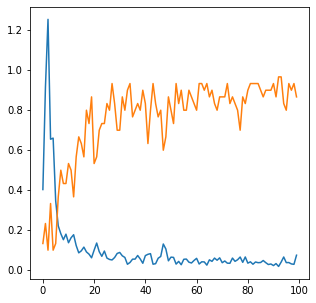

In [ ]:
def weight_init(w: int, h: int , mode = 'gauss') -> np.array:
    """
    w : columns, Width.
    h : rows, Height.
    mode : ['gaussian', 'uniform'] 
    https://discuss.pytorch.org/t/how-are-layer-weights-and-biases-initialized-by-default/13073   
    """
    if mode == 'gauss':
        w = np.random.randn(w, h) / np.sqrt(w*h)
    else:
        """
        равномерное распределение
        [низкий, высокий) (включает низкий, но исключает высокий).
        Другими словами, любое значение в пределах данного интервала с равной вероятностью будет нарисовано униформой.

        uniform distribution
        [low, high) (includes low, but excludes high).
        In other words, any value within the given interval is equally likely to be drawn by uniform.
        """
        w = np.random.uniform(-1, 1, size = (w, h)) / np.sqrt(w*h)
    return w.astype(np.float32)


np.random.seed(13)
lr = 0.001
batch = 30
#init weight
l1 = weight_init(784, 128)
l2 = weight_init(128, 10)

bar = trange(100)
accuracies, losses = [], []
for i in bar:
    samp = np.random.randint(0, x.shape[0], size=(batch))
    X = x[samp].reshape(-1, 28*28).float()
    Y = y[samp].long()

    x_loss, out, d_l1, d_l2 = backward(X.numpy(), Y.numpy(), l1, l2)

    cat = np.argmax(out, axis = 1)
    acc = (cat == Y.numpy()).mean()

    # update weight,  SGD

    l1 = l1 - lr * d_l1
    l2 = l2 - lr * d_l2

    x_loss = x_loss.mean()
    accuracies.append(acc)
    losses.append(x_loss)
    bar.set_description('Loss:  %.3f, Accuracy: %.3f' % (x_loss, acc))
figsize(5, 5)
plot(losses)
plot(accuracies)

In [ ]:
def forward(x: np.array)-> np.array:    
    x = x.dot(l1)    
    x = np.maximum(x, 0)    
    x = x.dot(l2)    
    return x
    
evaluate(forward)

0.8718


Loss:  0.025, Accuracy: 0.967: 100%|██████████| 500/500 [00:02<00:00, 201.42it/s]


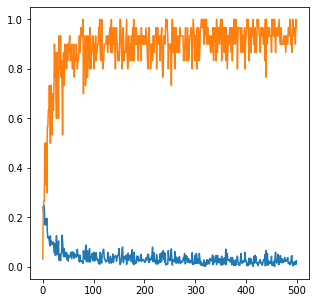

In [ ]:
np.random.seed(13)
lr = 0.001
batch = 30
#init weight
l1 = weight_init(784, 128, mode = 'uniform')
l2 = weight_init(128, 10, mode = 'uniform')

bar = trange(500)
accuracies, losses = [], []
for i in bar:
    samp = np.random.randint(0, x.shape[0], size=(batch))
    X = x[samp].reshape(-1, 28*28).float()
    Y = y[samp].long()

    x_loss, out, d_l1, d_l2 = backward(X.numpy(), Y.numpy(), l1, l2)

    cat = np.argmax(out, axis = 1)
    acc = (cat == Y.numpy()).mean()

    # update weight,  SGD

    l1 = l1 - lr * d_l1
    l2 = l2 - lr * d_l2

    x_loss = x_loss.mean()
    accuracies.append(acc)
    losses.append(x_loss)
    bar.set_description('Loss:  %.3f, Accuracy: %.3f' % (x_loss, acc))
figsize(5, 5)
plot(losses)
plot(accuracies)

In [ ]:
evaluate(forward)

0.9355
